In [6]:
import numpy as np
import pandas as pd
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [7]:
api = wandb.Api()
entity, project = "wwjbrugger", "Test_NGSR_10_05_21_ckpt"  # Test_NGSR_10_05_21_ckpt  Test_NGSR_12_05
# Example: January 1st, 2024

# created_at (str): ISO timestamp when the run was started
runs = api.runs(entity + "/" + project, )

means_sim = []
stds_sim = []
means_states = []
stds_states = []
experiment_name = []
not_found = []
results_of_experiment_dict = {}
for run in tqdm(runs):
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    # result_dict = run.summary._json_dict
    config_dict = {k: v for k, v in run.config.items() if not k.startswith("_")}
    result_dict = run.summary._json_dict

    if 'sim' in result_dict:
        if np.any(np.array(result_dict["sim"]) < 0):
            print('Hello ')
        name = config_dict['experiment_name']
        experiment_name.append(name)
        results_of_experiment_dict[name] = {}
        results_of_experiment_dict[name]['sim'] = result_dict["sim"]
        results_of_experiment_dict[name]['sim_median'] = np.median(result_dict["sim"])
        results_of_experiment_dict[name]['sim_mean'] = np.mean(result_dict["sim"])
        results_of_experiment_dict[name]['sim_std'] = np.std(result_dict["sim"])
        results_of_experiment_dict[name]['states'] = result_dict["states"]
        results_of_experiment_dict[name]['states_median'] = np.median(result_dict["states"])
        results_of_experiment_dict[name]['states_mean'] = np.mean(result_dict["states"])
        results_of_experiment_dict[name]['states_std'] = np.std(result_dict["states"])
        results_of_experiment_dict[name]['not_found'] = 500 - len(result_dict["states"])
    else:
        print(f"{config_dict['experiment_name']} no sim object")
print('end')

  0%|          | 0/47 [00:00<?, ?it/s]

test_model_token__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_Stringsupervised__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__LSTM_Measurement_Encoder__Transformer_Encoder_String500__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__MeasurementEncoderDummy__Transformer_Encoder_String500__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__TextTransformer__Transformer_Encoder_String500__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__TextTransformer__Transformer_Encoder_String5__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__TextTransformer__Transformer_Encoder_String250__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__MeasurementEncoderPicture__Transformer_Encoder_String500__Endgame__ no sim object
test_model__neural_net__data_grammar_8_run_1__LSTM_Measurement_Encoder__EquationEncoderDummy500__Endgame__ no sim object
test_model__

In [8]:
_experiment_name = [experiment for experiment in results_of_experiment_dict.keys()]
_sim_median = [results_of_experiment_dict[experiment]['sim_median'] for experiment in results_of_experiment_dict.keys()]
_sim_mean = [results_of_experiment_dict[experiment]['sim_mean'] for experiment in results_of_experiment_dict]
arg_sort = np.argsort(_sim_median)
for i in arg_sort:
    print(f"{_experiment_name[i]:<120} sim_median: {np.round(_sim_median[i], 2):<10}")

test_model__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_StringNone__Endgame__              sim_median: 3.0       
test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__      sim_median: 12.0      
test_model__neural_net__data_grammar_8_run_1__MeasurementEncoderPicture__Transformer_Encoder_String250__Endgame__        sim_median: 12.5      
test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String50__Endgame__       sim_median: 13.5      
test_model__neural_net__data_grammar_8_run_1__LSTM_Measurement_Encoder__Transformer_Encoder_String5__Endgame__           sim_median: 13.5      
test_model__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_String250__Endgame__               sim_median: 14.0      
test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String125__Endgame__      sim_median: 15.

In [9]:
def get_steps(experiment_name):
    if 'None' in experiment_name:
        return 'supervised'
    if '500__' in experiment_name:
        return int(500)
    if '250__' in experiment_name:
        return int(250)
    if '125__' in experiment_name:
        return int(125)
    if '50__' in experiment_name:
        return int(50)
    if '5__E' in experiment_name:
        return int(5)


def get_class_equation_encoder(string):
    path_to_complete_model = string
    if 'EquationEncoderDummy' in path_to_complete_model:
        return 'EquationEncoderDummy'
    if 'Transformer_Encoder_String' in path_to_complete_model:
        return 'Transformer_Encoder_String'


def get_prior_source(settings):
    path_to_complete_model = settings['path_to_complete_model']
    if 'neural_net' in path_to_complete_model:
        return 'neural_net'
    if 'uniform' in path_to_complete_model:
        return 'uniform'
    if 'grammar' in path_to_complete_model:
        return 'grammar'


def get_class_measurement_encoder(string):
    path_to_complete_model = string
    if '__MeasurementEncoderDummy__' in path_to_complete_model:
        return 'MeasurementEncoderDummy'
    if '__Bi_LSTM_Measurement_Encoder__' in path_to_complete_model:
        return 'Bi_LSTM_Measurement_Encoder'
    if '__LSTM_Measurement_Encoder__' in path_to_complete_model:
        return 'LSTM_Measurement_Encoder'
    if '__MLP_Measurement_Encoder__' in path_to_complete_model:
        return 'MLP_Measurement_Encoder'
    if '__DatasetTransformer__' in path_to_complete_model:
        return 'DatasetTransformer'
    if '__MeasurementEncoderPicture__' in path_to_complete_model:
        return 'MeasurementEncoderPicture'
    if '__TextTransformer__' in path_to_complete_model:
        return 'TextTransformer'
    else:
        raise AssertionError(f" {path_to_complete_model} Could not be passed")

In [27]:
from itertools import product

panda_index = [
    'MeasurementEncoderDummy',
    'LSTM_Measurement_Encoder',
    'Bi_LSTM_Measurement_Encoder',
    'MLP_Measurement_Encoder',
    'DatasetTransformer',
    'MeasurementEncoderPicture',
    'TextTransformer'
]
syntax_tree = ['EquationEncoderDummy', 'Transformer_Encoder_String'] 
mcts =  ['250', '125', '50', '5', 'supervised', 'token' ]
panda_column = [''.join(tup) for tup in product(syntax_tree, mcts)]
panda_column.append('grammar')
panda_column.append('uniform')
table = pd.DataFrame(index=panda_index, columns=panda_column)
for experiment_name in results_of_experiment_dict: 
    if experiment_name == 'test_model__grammar':
        table.loc['MeasurementEncoderDummy', 'grammar'] = results_of_experiment_dict[experiment_name]['sim_median']
    elif experiment_name == 'test_model__uniform':
        table.loc['MeasurementEncoderDummy', 'uniform'] = results_of_experiment_dict[experiment_name]['sim_median']
    else: 
        steps = get_steps(experiment_name)
        measurement_encoder = get_class_measurement_encoder(experiment_name)
        equation_encoder = get_class_equation_encoder(experiment_name)
        c = ''.join((equation_encoder, str(steps)))
        table.loc[measurement_encoder, c] = results_of_experiment_dict[experiment_name]['sim_median']
latex_table = table.to_string()#toto_latex()
with open('table.tex', 'w') as f:
    f.write(latex_table)
# for experiment in results_of_experiment_dict:
#     steps = str(get_steps(experiment_name))
#     equation_encoder = get_class_equation_encoder(experiment_name)
#     measurement_encoder = get_class_measurement_encoder(experiment_name)

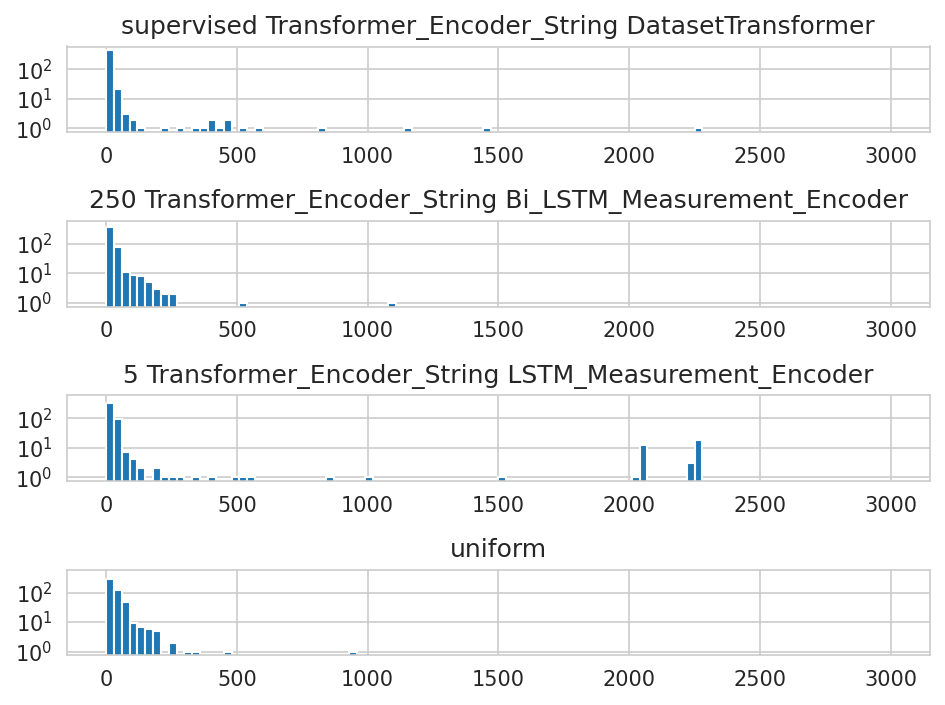

In [11]:
## plot histogram 
import matplotlib.pyplot as plt


def get_title(experiment_name):
    if 'uniform' in experiment_name:
        return 'uniform'
    title = ''
    title += str(get_steps(experiment_name))
    title += ' '
    title += get_class_equation_encoder(experiment_name)
    title += ' '
    title += get_class_measurement_encoder(experiment_name)
    return title


fig, axs = plt.subplots(4, 1, sharey=True,
                        #sharex=True,
                        tight_layout=True,
                        dpi=150)
for i, experiment in enumerate([
    'test_model__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_StringNone__Endgame__',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__',
    'test_model__neural_net__data_grammar_8_run_1__LSTM_Measurement_Encoder__Transformer_Encoder_String5__Endgame__',
    'test_model__uniform'
]):
    axs[i].hist(results_of_experiment_dict[experiment]['sim'], bins=100, log=True,
                range=(0, 3000)
                )
    axs[i].set_title(get_title(experiment))